In [1]:
# path to requirements.txt
!pip install -r /data/workspace_files/requirements.txt
#!pip install -r ../requirements.txt

     |████████████████████████████████| 2.0 MB 27.9 MB/s            
     |████████████████████████████████| 11.3 MB 64.9 MB/s            
     |████████████████████████████████| 17.1 MB 54.8 MB/s            
     |████████████████████████████████| 11.7 MB 32.6 MB/s            
     |████████████████████████████████| 41.6 MB 45.6 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
  Attempting uninstall: pip
    

In [3]:
import pathlib
import sys

home = str(pathlib.Path().resolve().parent) 
sys.path.insert(0, home)

from src.data_loading import load_data
from src.errors import plot_parameters_space, plot_errors
from src.main import number_analysis, error_analysis, data_analysis
home

'/data'

In [4]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt

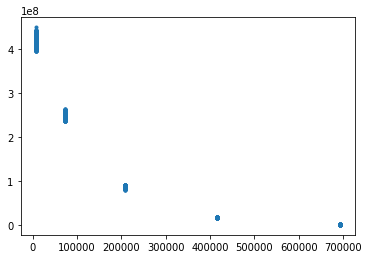

In [5]:
data = np.loadtxt('/data/workspace_files/data/DOSY-R2-1-4-DMSO-5points-1000raz-integrals.txt', skiprows=1)
z, I = data[:, 0], data[:, 1]
plt.plot(z, I, '.')

In [6]:
Is = np.zeros((5, 851))
for i in range(5):
    Is[i] = I[np.where(z == np.unique(z)[i])]

In [34]:
print(np.std(Is, axis=1)/np.mean(Is, axis=1))

[0.02306225 0.02193577 0.02456962 0.02941381 0.70414085]


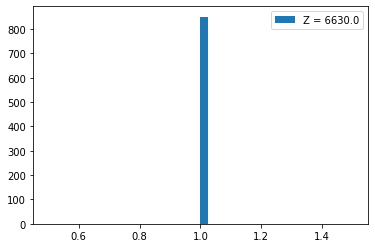

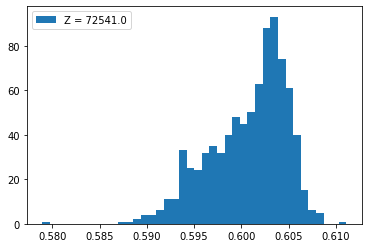

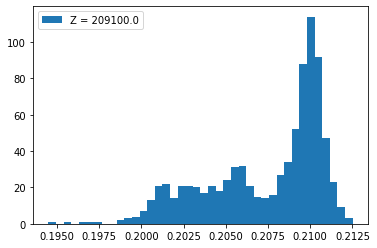

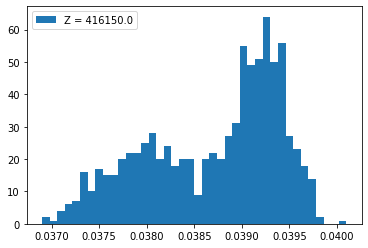

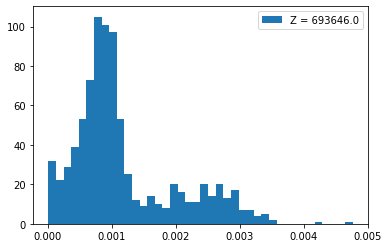

In [8]:
for i in range(5):
    plt.hist(Is[i]/Is[0], bins=40, label=f"Z = {z[i]}")
    plt.legend()
    plt.savefig(f"data_hist_{i}I0.png", dpi=300)
    plt.show()

0.01118197367415283


ValueError: ValueError: operands could not be broadcast together with shapes (739,) (752,) 

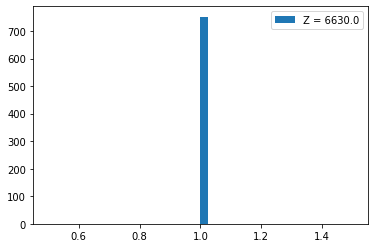

In [9]:
thershold = [4.2*1e8, 2.55*1e8, 8.7*1e7, 1.6*1e7, 0]
for i in range(5):
    I = Is[i][Is[i] > thershold[i]]
    plt.hist(I, bins=40, label=f"Z = {z[i]}")
    print(np.std(I)/np.mean(I))
    plt.legend()
    #plt.savefig(f"data_hist_leftcut{i}.png", dpi=300)
    plt.show()

In [9]:
X = np.zeros((5, 128))
Y = np.zeros((5, 128))
for i in range(5):
    x, y = load_data(f'/data/workspace_files/data/R2_5times/DOSY-R2-1-4-DMSO-128points-{i+1}.txt', scale=1e6)
    X[i] = x
    Y[i] = y

[0.00062694 0.00103011]
[0.00120699 0.00184243]
[0.00066025 0.00105161]
[0.00051515 0.00082794]
[0.00053942 0.00090369]


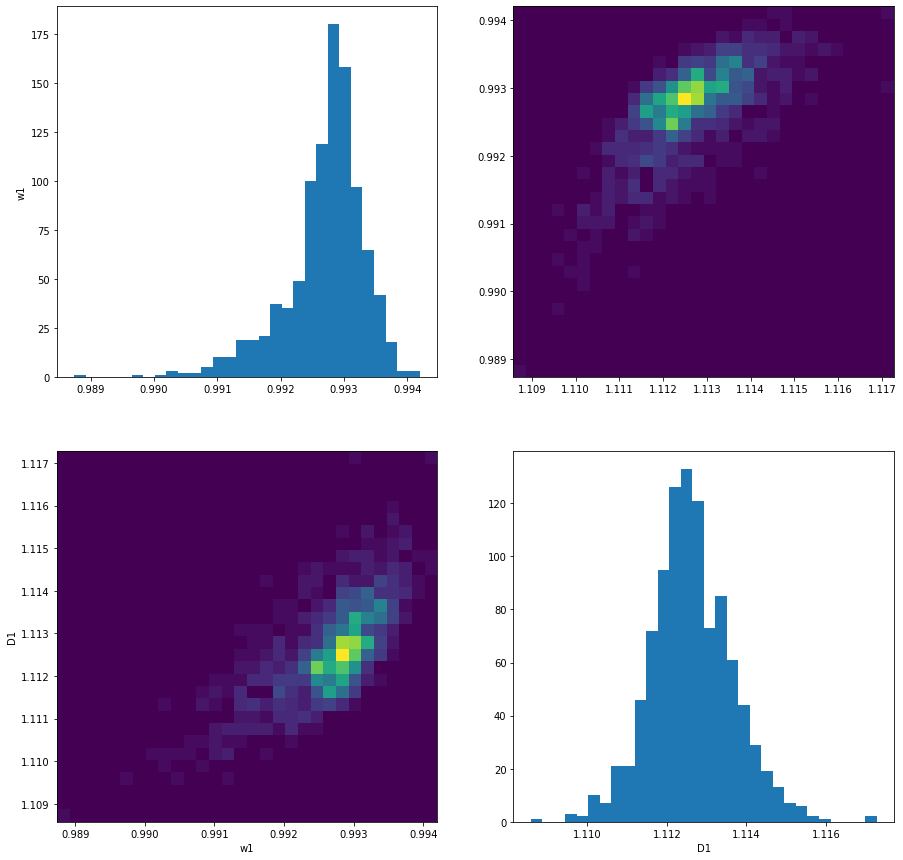

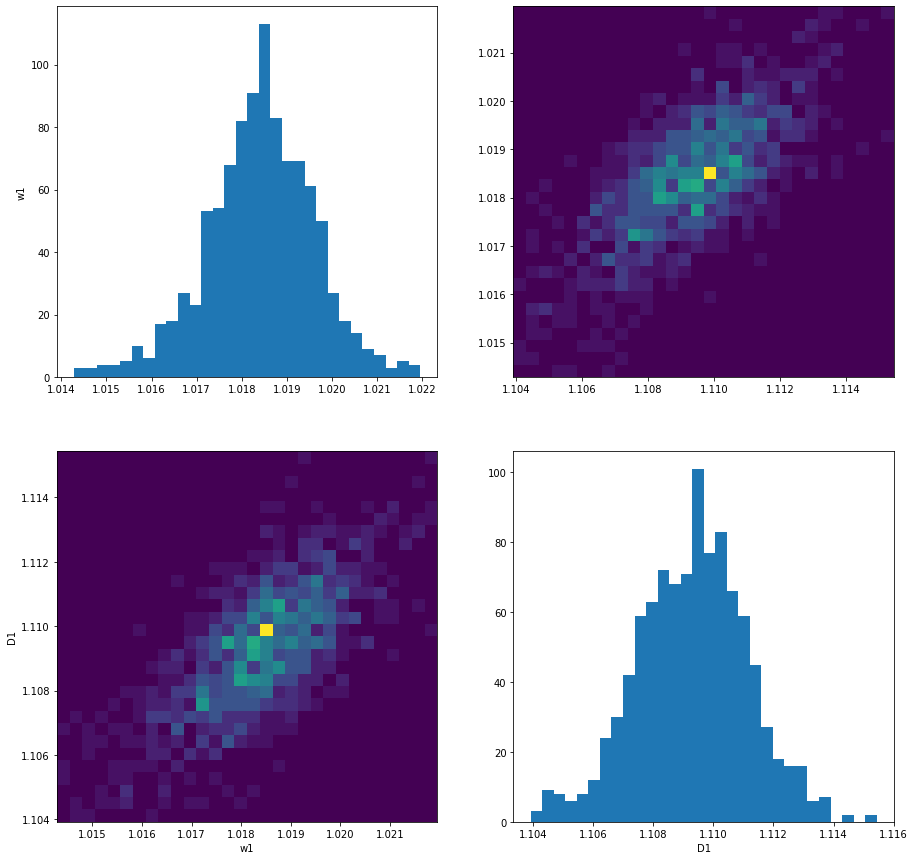

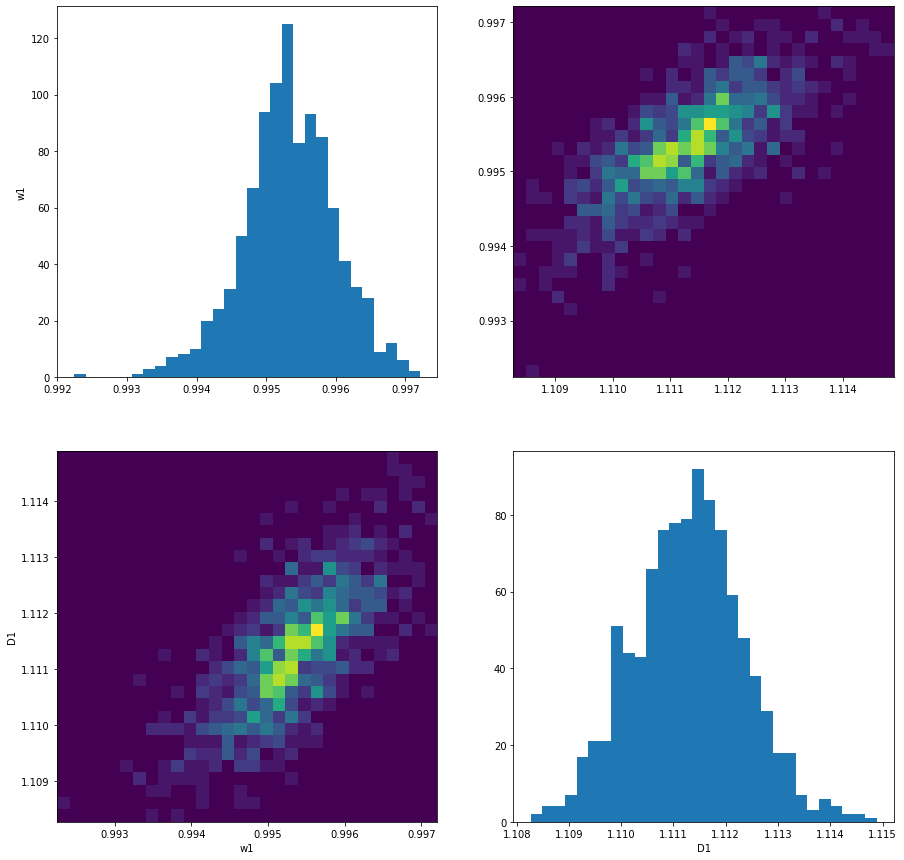

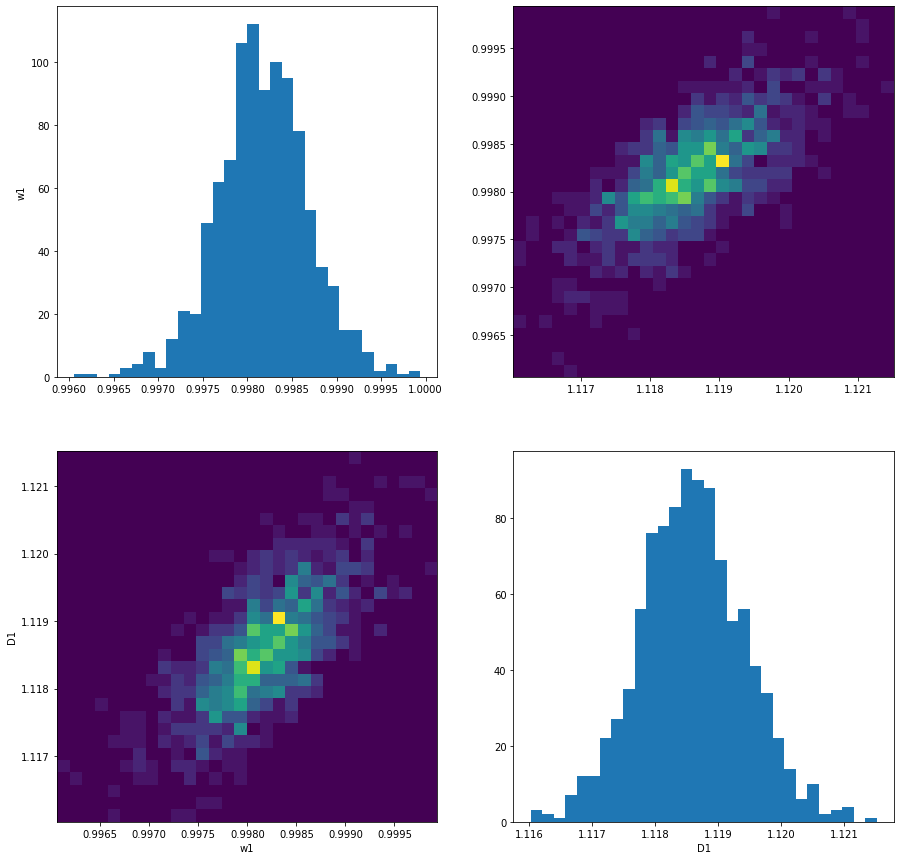

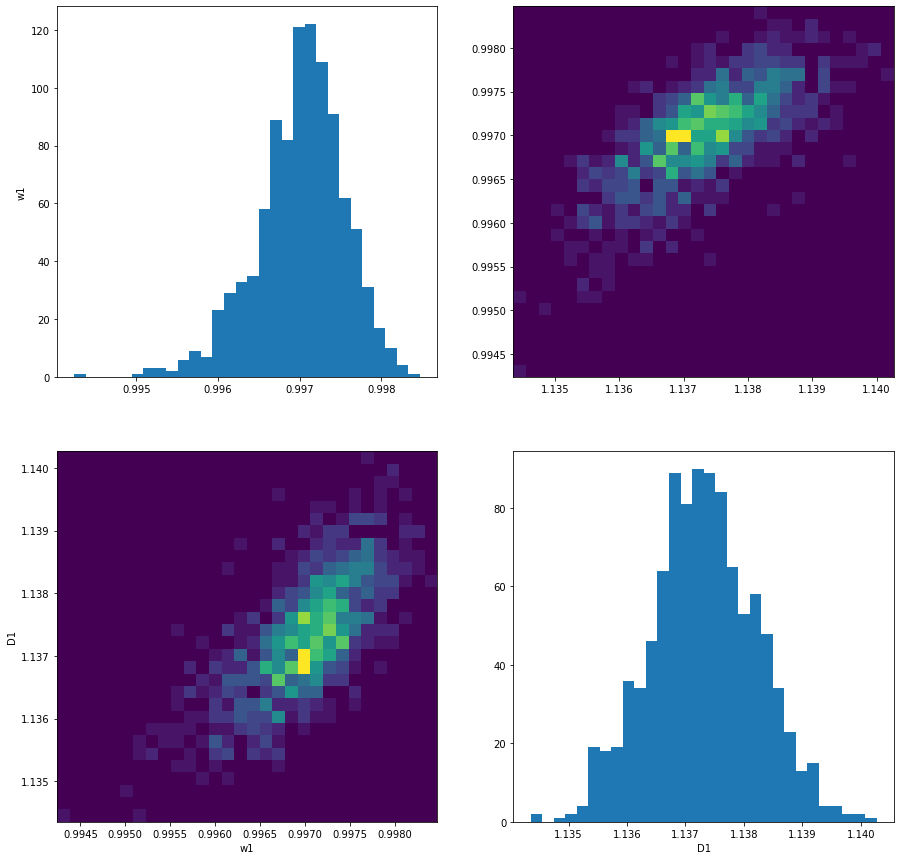

In [29]:
init_thetas = np.zeros((5, 2))
ress = np.zeros((5, 128))
for i in range(5):
    init_theta, thetas, res = error_analysis(1, X[0], Y[i], method='BFGS', reg=0.005)
    print(np.std(thetas, axis=0))
    plot_parameters_space(thetas)
    plt.show()
    init_thetas[i] = init_theta
    ress[i] = res

In [33]:
print(np.std(init_thetas, axis=0)/np.mean(init_thetas, axis=0))

[0.00923904 0.00902248]


In [31]:
Ys = np.zeros((5, 128))
for i in range(5):
    Ys[i] = Y[i]

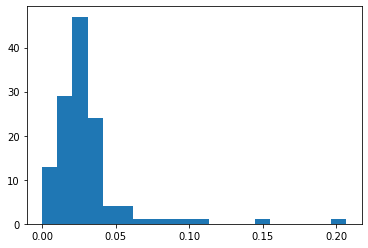

In [32]:
plt.hist(np.std(Ys, axis=0)/np.mean(Ys, axis=0), bins=20)
plt.show()